In [1]:
import pandas as pd
import numpy as np
import sklearn
import dask.dataframe as dd
import os
from subprocess import call
%matplotlib inline

In [2]:
location='/home/ds/notebooks/Data/train.csv'
#df=pd.read_csv(location)

In [3]:
os.popen("ls -lh Data/train.csv").read()

'-rw-r--r-- 1 root root 3.8G Apr 15 22:51 Data/train.csv\n'

In [8]:
df = dd.read_csv(location,usecols=['hotel_cluster'])

In [9]:
df_sample=df.sample(frac=0.1)

In [10]:
df_cluster=pd.DataFrame(df_sample.hotel_cluster.value_counts().head(10))

In [11]:
df_cluster=df_cluster.reset_index()

/opt/ds/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/ds/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


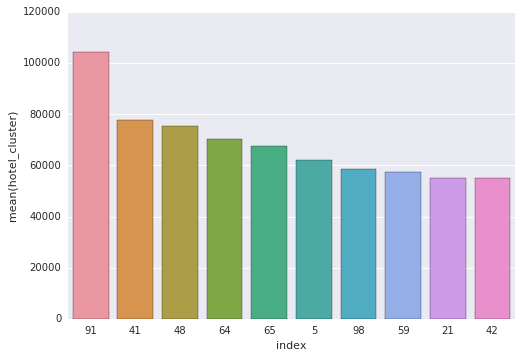

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# preferred continent destinations
sns.barplot(x="index",y="hotel_cluster", data=df_cluster)

In [13]:
train = pd.read_csv(location, parse_dates=['date_time', 'srch_ci', 'srch_co'], nrows=100000)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
date_time                    100000 non-null datetime64[ns]
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63078 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99929 non-null datetime64[ns]
srch_co                      99929 non-null datetime64[ns]
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id          100000 non-null int

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# preferred continent destinations
train_cluster=train.hotel_cluster.value_counts().head(10)
#sns.countplot(y="hotel_cluster", data=train_cluster)

In [15]:
train.groupby(['hotel_cluster']).agg({'hotel_cluster':'size'}).sort('hotel_cluster').nlargest(10,'hotel_cluster')

/opt/ds/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,hotel_cluster
hotel_cluster,
91,2777
41,2176
48,2077
64,1984
65,1633
5,1563
42,1557
98,1526
59,1474


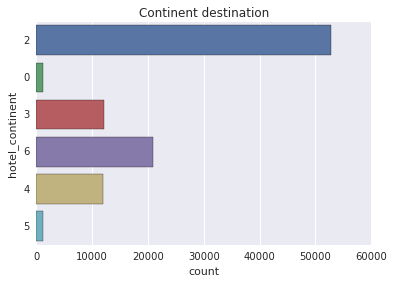

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y='hotel_continent', data=train)
sns.plt.title('Continent destination')

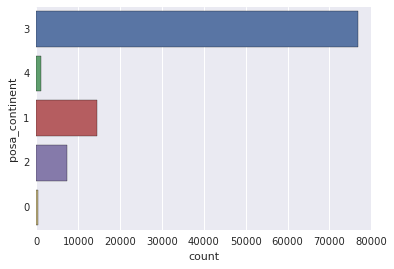

In [107]:
sns.countplot(y='posa_continent', data=train)

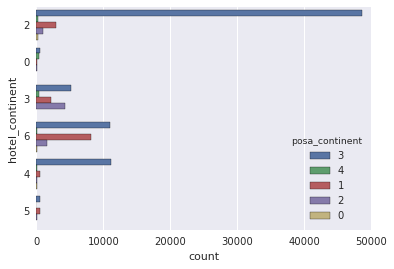

In [108]:
sns.countplot(y='hotel_continent', hue='posa_continent', data=train)

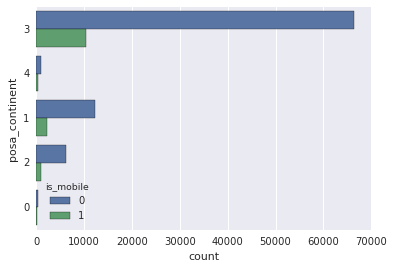

In [109]:
# how many people by continent are booking from mobile
sns.countplot(y='posa_continent', hue='is_mobile', data = train)

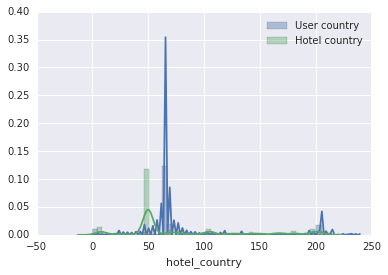

In [111]:
# Difference between user and destination country
sns.distplot(train['user_location_country'], label="User country")
sns.distplot(train['hotel_country'], label="Hotel country")
plt.legend()

In [16]:
train.groupby('is_booking').size()

is_booking
0    91730
1     8270
dtype: int64

In [17]:
columns = train.columns
# Analyze features size (if categorical or not)
for col in columns:
    print(col)
    print(len(set(train[col])))
    print(79*'*')

date_time
99840
*******************************************************************************
site_name
38
*******************************************************************************
posa_continent
5
*******************************************************************************
user_location_country
123
*******************************************************************************
user_location_region
510
*******************************************************************************
user_location_city
3751
*******************************************************************************
orig_destination_distance
79943
*******************************************************************************
user_id
3478
*******************************************************************************
is_mobile
2
*******************************************************************************
is_package
2
*******************************************************************************
channel
1